# Machine Learning

---

## Simbench Data [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/machine_learning_tutorial/0_simbench_ts.py) | [Documentation](https://github.com/e2nIEE/simbench/blob/master/tutorials/simbench_grids_basics_and_usage.ipynb)

<a href="http://www.youtube.com/watch?feature=player_embedded&v=kHbAMoCv-d4" target="_blank">
    <img 
        src="http://img.youtube.com/vi/kHbAMoCv-d4/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [1]:
import simbench as sb

grid_code = "1-HV-urban--0-sw"
net = sb.get_simbench_net(grid_code)
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

print(profiles.keys())

C:\Users\junai\anaconda3\envs\PandaPower\lib\site-packages\simbench\converter\csv_pp_converter.py:390: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_bus = data["Measurement"].index.difference(idx_line | idx_trafo).astype(int)
C:\Users\junai\anaconda3\envs\PandaPower\lib\site-packages\simbench\converter\csv_pp_converter.py:468: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  missing = csv_data["Line"].index.difference(idx_lines | idx_dclines)
C:\Users\junai\anaconda3\envs\PandaPower\lib\site-packages\simbench\converter\csv_pp_converter.py:472: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  i

dict_keys([('load', 'p_mw'), ('load', 'q_mvar'), ('sgen', 'p_mw'), ('gen', 'p_mw'), ('storage', 'p_mw')])


In [2]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (372 elements)
   - load (79 elements)
   - sgen (98 elements)
   - switch (498 elements)
   - ext_grid (1 element)
   - line (113 elements)
   - trafo (3 elements)
   - measurement (1122 elements)
   - bus_geodata (372 elements)
   - substation (14 elements)
   - loadcases (6 elements)


In [3]:
# To start time series calculations, we need profiles
load_p = profiles[("load", "p_mw")]
load_q = profiles[("load", "q_mvar")]
sgen_p = profiles[("sgen", "p_mw")]

# columns are element indices and rows are timestamps
print(sgen_p)

        0    1    2    3    4    5    6    7    8    9   ...        88  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  7.521221   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  7.508898   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  7.496576   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  7.484254   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  7.471932   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
35131  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.765590   
35132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
35133  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
35134  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
35135  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

             89         90         91        92        93         94  \
0      3.450101  10.126047  21.623509  

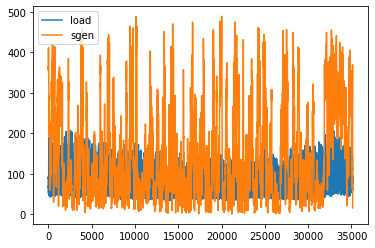

In [4]:
import matplotlib.pyplot as plt
load_p.sum(axis=1).plot(label="load")
sgen_p.sum(axis=1).plot(label="sgen")
plt.legend()
plt.show()

In [5]:
# timeseries calculation
import pandapower.timeseries as ts
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData

ds = DFData(sgen_p)
ConstControl(net, "sgen", "p_mw", element_index=net.sgen.index, profile_name=sgen_p.columns, data_source=ds)

ds = DFData(load_p)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=load_p.columns, data_source=ds)

ds = DFData(load_q)
ConstControl(net, "load", "q_mvar", element_index=net.load.index, profile_name=load_q.columns, data_source=ds)

ts.OutputWriter(net, output_path="./machine_learning_data", output_file_type=".json")
ts.run_time_series.run_timeseries(net)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
recycle is set to True, but internal variables are missing


Progress: |██████████████████████████████████████████████████| 100.0% Complete



---

## Data Preprocessing [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/machine_learning_tutorial/1_ann_data.py) | [Documentation]()

<a href="http://www.youtube.com/watch?feature=player_embedded&v=RBY03lV_gE4" target="_blank">
    <img 
        src="http://img.youtube.com/vi/RBY03lV_gE4/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [6]:
import simbench as sb

grid_code = "1-HV-urban--0-sw"
net = sb.get_simbench_net(grid_code)
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

sgen_p = profiles[("sgen", "p_mw")]
load_p = profiles[("load", "p_mw")]
load_q = profiles[("load", "q_mvar")]

C:\Users\junai\anaconda3\envs\PandaPower\lib\site-packages\simbench\converter\csv_pp_converter.py:390: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  idx_bus = data["Measurement"].index.difference(idx_line | idx_trafo).astype(int)
C:\Users\junai\anaconda3\envs\PandaPower\lib\site-packages\simbench\converter\csv_pp_converter.py:468: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  missing = csv_data["Line"].index.difference(idx_lines | idx_dclines)
C:\Users\junai\anaconda3\envs\PandaPower\lib\site-packages\simbench\converter\csv_pp_converter.py:472: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  i

In [7]:
import pandas as pd
X = pd.concat([sgen_p, load_p, load_q], axis=1)
y = pd.read_json("./machine_learning_data/res_line/loading_percent.json")

In [9]:
# Randomly split data for training and testing from the available test data
from sklearn.model_selection import train_test_split
# Use 10 percent of X and y for training
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1)

In [10]:
# Scale data because neural network can learn better from scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Save splitted and scaled data using numpy
import numpy as np
np.save("./machine_learning_data/X_train.npy", X_train)
np.save("./machine_learning_data/X_test.npy", X_test)
np.save("./machine_learning_data/y_train.npy", y_train)
np.save("./machine_learning_data/y_test.npy", y_test)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(35136, 256)
(3513, 256)
(31623, 256)


---

## Training and Prediction [Code](https://github.com/FlorianShepherd/pandapower-youtube/blob/master/scripts/machine_learning_tutorial/2_ann_prediction.py) | [Documentation]()

<a href="http://www.youtube.com/watch?feature=player_embedded&v=OSnW_AE1nFY" target="_blank">
    <img 
        src="http://img.youtube.com/vi/OSnW_AE1nFY/0.jpg" 
        alt="Easy plotting Youtube Video" width="240" height="180" border="10" 
    />
</a>

In [12]:
import numpy as np
# sgen_p, load_p, load_q
X_train = np.load("machine_learning_data/X_train.npy")
X_test = np.load("machine_learning_data/X_test.npy")
# line loading results
y_train = np.load("machine_learning_data/y_train.npy")
y_test = np.load("machine_learning_data/y_test.npy")

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
# x is already scaled

In [14]:
# MLPRegressor supports multi-output
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(verbose=1)
# 10 percent of powerflow data
ann.fit(X_train, y_train)
# 90 percent of powerflow data
y_predict = ann.predict(X_test)
# predicted output is scaled, so we have to inverse transform it to compare it with actual results
y_predict = scaler.inverse_transform(y_predict)

Iteration 1, loss = 0.47172296
Iteration 2, loss = 0.20995897
Iteration 3, loss = 0.12248529
Iteration 4, loss = 0.09536449
Iteration 5, loss = 0.07996230
Iteration 6, loss = 0.06940318
Iteration 7, loss = 0.06180353
Iteration 8, loss = 0.05544569
Iteration 9, loss = 0.05107491
Iteration 10, loss = 0.04589400
Iteration 11, loss = 0.04194674
Iteration 12, loss = 0.03861237
Iteration 13, loss = 0.03531160
Iteration 14, loss = 0.03267732
Iteration 15, loss = 0.03034100
Iteration 16, loss = 0.02821725
Iteration 17, loss = 0.02611253
Iteration 18, loss = 0.02381357
Iteration 19, loss = 0.02221475
Iteration 20, loss = 0.02092527
Iteration 21, loss = 0.01972267
Iteration 22, loss = 0.01842233
Iteration 23, loss = 0.01728552
Iteration 24, loss = 0.01657937
Iteration 25, loss = 0.01697629
Iteration 26, loss = 0.01591803
Iteration 27, loss = 0.01445558
Iteration 28, loss = 0.01373740
Iteration 29, loss = 0.01316311
Iteration 30, loss = 0.01322645
Iteration 31, loss = 0.01248334
Iteration 32, los

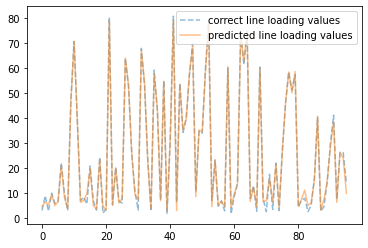

In [15]:
import matplotlib.pyplot as plt
# we look at first 96 timestamps for line 53
# line 53 because, we cheated and looked up the line with highest loading
# plt.plot(y_test[:96, 53], alpha=.5, linestyle="--", label="correct line loading values")
# plt.plot(y_predict[:96, 53], alpha=.5, linestyle="-", label="predicted line loading values")
plt.plot(y_test[:96, 53], alpha=.5, linestyle="--", label="correct line loading values")
plt.plot(y_predict[:96, 53], alpha=.5, linestyle="-", label="predicted line loading values")
plt.legend()
plt.show()

In [16]:
# Quantify error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(f"the error is only {mse:.2f}%")

the error is only 0.10%


In [17]:
# Check prediction time for nearly 35000 timestamps
from time import time
t0 = time()
y_predict = ann.predict(X_test)
t1 = time() - t0
print(f"ANN time: {t1:.2f}")

ANN time: 0.17


> It was a very simple example because we didn't optimize hyper-parameters. We just trained on the load, sgen values and line loading predictions. This can ofcourse be further optimized but this is nice little example to demonstrate how **Python** and **pandapower** work great together.

---